In [1]:
import osmnx as ox
import networkx as nx
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

Matplotlib is building the font cache; this may take a moment.


Change the 'location' variable to a chosen lat/long pair that will be the center point of your map

In [2]:
location = (36.001449862880314, -78.93823265159807)

Change the 'dist' variable to modify how much area is included in the graph.

Note: Higher 'dist' means more mapping nodes, which drastically increases the amount of time needed to process the graph.

/Users/israeldellinger/anaconda3/envs/Mapping/lib/python3.11/site-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


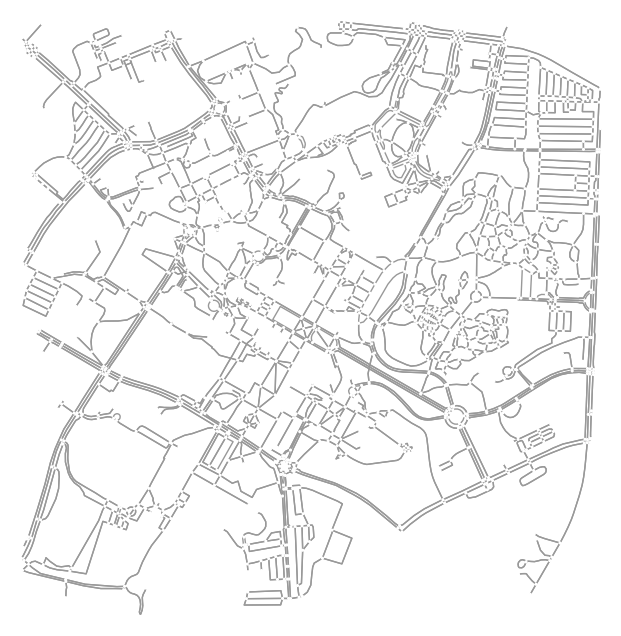

(<Figure size 1000x800 with 1 Axes>, <Axes: >)

In [4]:
base_map = ox.graph_from_point(location, dist= 750, simplify=True)
ox.plot_graph(base_map, figsize= (10,8),bgcolor= "#00000000", node_size=5)

If you'd like to specify a bounding box for more customization you can do so using this tool: (https://boundingbox.klokantech.com/)

In [4]:
#bbox_map = ox.graph_from_bbox(north= 45.5380073544, south= 45.5105864524, east= -122.6179949753, west= -122.7251116745)
#ox.plot_graph(bbox_map, figsize= (15,15), node_size=2)

The code block below will calculate the area of the graph in meters squared.

In [15]:
base_map_proj = ox.project_graph(base_map)
nodes_proj = ox.graph_to_gdfs(base_map_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

5121461.125307662

The 'n' value in the code below is the number of nodes in the graph. The higher the value of 'n', the longer it will take to calculate edge centrality.

In [6]:
ox.basic_stats(base_map_proj, area=graph_area_m, clean_int_tol=15)

{'n': 3839,
 'm': 10694,
 'k_avg': 5.571242511070591,
 'edge_length_total': 343696.85100000055,
 'edge_length_avg': 32.13922302225552,
 'streets_per_node_avg': 2.891377963011201,
 'streets_per_node_counts': {0: 0,
  1: 750,
  2: 10,
  3: 2058,
  4: 967,
  5: 39,
  6: 13,
  7: 1,
  8: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.1953633758791352,
  2: 0.0026048450117218025,
  3: 0.5360771034123469,
  4: 0.2518885126334983,
  5: 0.01015889554571503,
  6: 0.003386298515238343,
  7: 0.00026048450117218026,
  8: 0.00026048450117218026},
 'intersection_count': 3089,
 'street_length_total': 177309.71200000006,
 'street_segment_count': 5502,
 'street_length_avg': 32.22641075972375,
 'circuity_avg': 1.0691094355772717,
 'self_loop_proportion': 0.0034532897128316978,
 'clean_intersection_count': 493,
 'node_density_km': 743.5789152927429,
 'intersection_density_km': 598.3108281686071,
 'edge_density_km': 66570.91212714558,
 'street_density_km': 34343.25692102857,
 'clean_intersection_den

Closeness centrality measures how central or well-connected a node is within a network. It is calculated by looking at the average distance from a node to all other nodes in the network.

Note: If you used the bounding box feature replace 'base_map' with 'bbox_map'

In [5]:
edge_centrality = nx.closeness_centrality(nx.line_graph(base_map))
nx.set_edge_attributes(base_map, edge_centrality, "edge_centrality")

You can change the 'cmap' value to alter the color scheme of the output: 'viridis', 'plasma', 'inferno', 'magma', 'cividis' are the Perceptually Uniform Sequential colormaps provided by Matplotlib.

Or you can create your own custom colormaps

In [8]:
unc_color = ["dodgerblue","lightskyblue","lightcyan"]
cmap1 = LinearSegmentedColormap.from_list("unc_color", unc_color)
nodes = [0.0,0.7,1.0]
cmap2 = LinearSegmentedColormap.from_list("unc_color", list(zip(nodes, unc_color)))
mpl.colormaps.register(cmap=cmap2, name="unc_color")

In [23]:
umi_color = ["gold","yellow","lightyellow"]
cmap1 = LinearSegmentedColormap.from_list("umi_color", umi_color)
nodes = [0.0,0.7,1.0]
cmap2 = LinearSegmentedColormap.from_list("umi_color", list(zip(nodes, umi_color)))
mpl.colormaps.register(cmap=cmap2, name="umi_color")

In [ ]:
uo_color = ["gold","yellow","lightyellow"]
cmap1 = LinearSegmentedColormap.from_list("uo_color", uo_color)
nodes = [0.0,0.7,1.0]
cmap2 = LinearSegmentedColormap.from_list("uo_color", list(zip(nodes, uo_color)))
mpl.colormaps.register(cmap=cmap2, name="uo_color")

In [39]:
osu_color = ["orangered","darkorange","orange"]
cmap1 = LinearSegmentedColormap.from_list("osu_color1", osu_color)
nodes = [0.0,0.8,1.0]
cmap2 = LinearSegmentedColormap.from_list("osu_color1", list(zip(nodes, osu_color)))
mpl.colormaps.register(cmap=cmap2, name="osu_color1")

In [6]:
duke_color = ["darkblue","blue","white"]
cmap1 = LinearSegmentedColormap.from_list("duke_color", duke_color)
nodes = [0.0,0.7,1.0]
cmap2 = LinearSegmentedColormap.from_list("duke_color", list(zip(nodes, duke_color)))
mpl.colormaps.register(cmap=cmap2, name="duke_color")

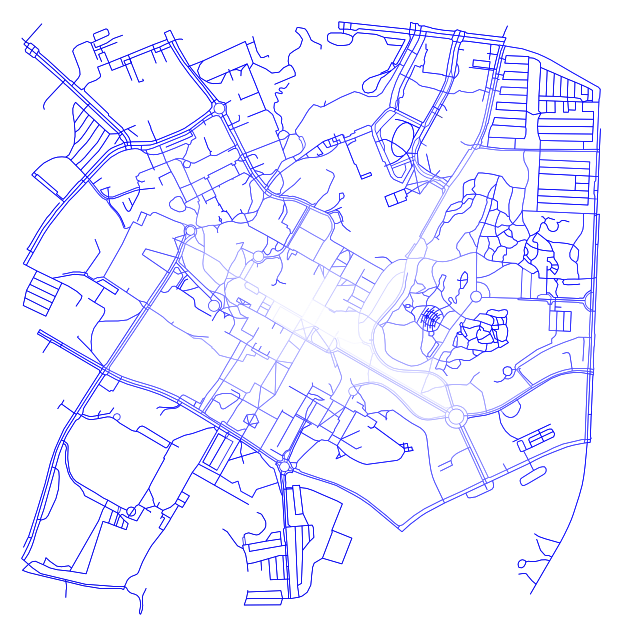

In [7]:
ec = ox.plot.get_edge_colors_by_attr(base_map, "edge_centrality", cmap="duke_color")
fig, ax = ox.plot_graph(base_map, bgcolor="#00000000", edge_color=ec, edge_linewidth=0.5, node_size=0,save=True, filepath=r"C:\Users\israe\Desktop\Files\Coding\Repos\PostGIS-mapping-python\image.png", dpi= 1200)